In [48]:
import numpy as np
from spn.algorithms.LearningWrappers import learn_parametric, learn_classifier
from spn.structure.leaves.parametric.Parametric import Categorical, Gaussian, CategoricalDictionary
from spn.structure.Base import Context
from spn.algorithms.MPE import mpe
from spn.algorithms.Inference import log_likelihood

In [52]:
np.random.seed(123)
train_data = np.c_[np.r_[np.random.normal(5, 1, (500, 2)), np.random.normal(10, 1, (500, 2))],
                   np.r_[np.zeros((500, 1)), np.ones((500, 1))]]

spn_classification = learn_classifier(train_data, Context(parametric_types=[Gaussian, Gaussian, Categorical]).add_domains(train_data), learn_parametric, 2)

In [60]:
test_classification = np.array([3.0, 4.0, np.nan, 12.0, 18.0, np.nan]).reshape(-1, 3)
mpe_test = mpe(spn_classification, test_classification)
print(mpe_test)

[[ 3.  4.  0.]
 [12. 18.  1.]]


In [61]:
ll = log_likelihood(spn_classification, test_classification)
print(ll, np.exp(ll))

[[ -4.88045186]
 [-40.16029647]] [[7.59358199e-03]
 [3.61913556e-18]]


In [66]:
from spn.algorithms.Statistics import get_structure_stats
print(get_structure_stats(spn_classification))

---Structure Statistics---
# nodes             9
    # sum nodes     1
    # prod nodes    2
    # leaf nodes    6
# edges             8
# layers            3


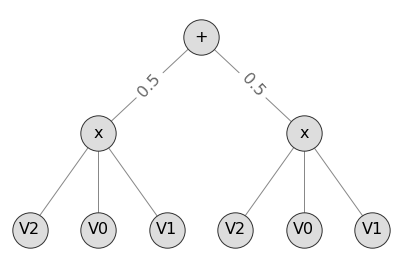

In [67]:
from spn.io.Graphics import plot_spn
plot_spn(spn_classification, 'basicspn.png')